# Credit Card Fraud Detection

### Importing Required Packages

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
os.getcwd()

'/content'

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditData/creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Cleaning and Preprocessing

In [6]:
# Check for any null values in dataset
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking Distribution of data

Text(0.5, 1.0, 'Class Distributions')

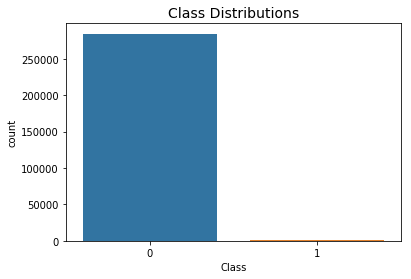

In [9]:
sns.countplot('Class', data=data)
plt.title('Class Distributions', fontsize=14)

In [10]:
# Check how much of the data is fraud and how much is not fraud
print('Non Fraudulent Transactions', round(data['Class'].value_counts()[0]/len(data)* 100, 2), '% of the dataset')
print('Fraudulent Transactions', round(data['Class'].value_counts()[1]/len(data)* 100, 2), '% of the dataset')

Non Fraudulent Transactions 99.83 % of the dataset
Fraudulent Transactions 0.17 % of the dataset


Dataset is extremely imbalanced. This is not ideal because our model will just assume that most transactions are non-fraudulent, however we want our model to be able to detect patterns and signs of fraud transactions

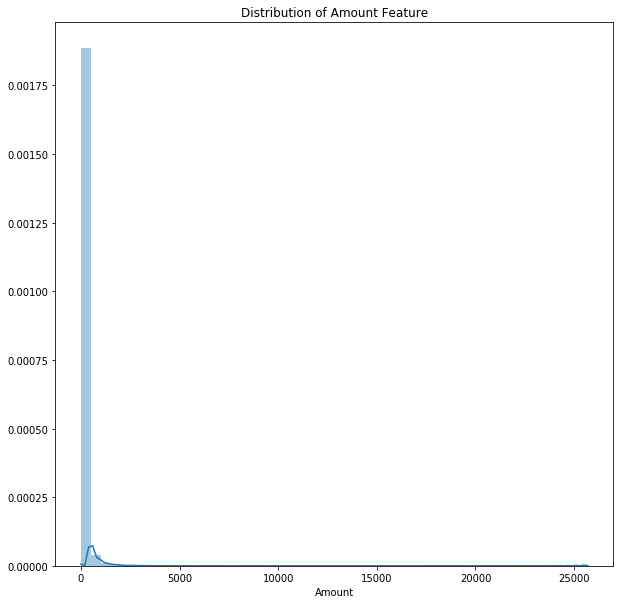

In [11]:
# Check the distribution of the amount feature
plt.figure(figsize = (10,10))
plt.title('Distribution of Amount Feature')
sns.distplot(data.Amount)

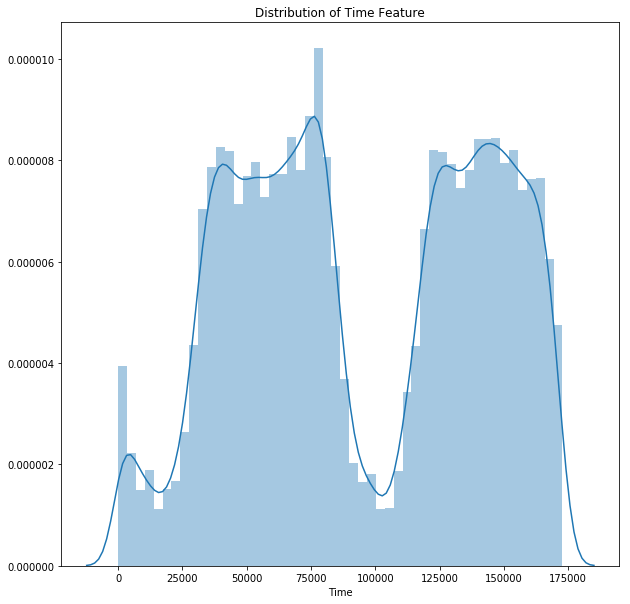

In [12]:
# Check distribution of time feature
plt.figure(figsize = (10,10))
plt.title('Distribution of Time Feature')
sns.distplot(data.Time)

By seeing the distribution of the features, we're able to identify how skewed the data is. In the case of the 'Amount' Feature, the distribution is heavily skewed to the left. We will implement methods to make the features more normally distributed later on

### Creating a Subsample

We need to create a subsample of our data so that the ratio between non fraud and fraud transactions is 50/50. By doing so we will avoid overfitting because if we used our imbalanced dataset, it'll assume that almost all transactions are non fraudulent

Before we do so, we need to scale the 'Amount' and 'Time' Features

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [0]:
# Splitting data in training and test sets
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [16]:
print('Training Shape: ' + str(X_train.shape))
print('Testing Shape: ' + str(X_test.shape))

Training Shape: (213605, 30)
Testing Shape: (71202, 30)


### Random Under-Sampling

In [17]:
training_data = pd.concat([X_train,y_train], axis = 1)
training_data['Class'].value_counts()

0    213233
1       372
Name: Class, dtype: int64

In [0]:
frauds = training_data[training_data['Class'] == 1]
not_frauds = training_data[training_data['Class'] == 0]

not_frauds_sampled = not_frauds.sample(len(frauds))
balanced_data = pd.concat([not_frauds_sampled, frauds], axis = 0)

X_train_sampled = balanced_data.drop(['Class'], axis = 1)
y_train_sampled = balanced_data['Class']

Text(0.5, 1.0, 'Class Distributions')

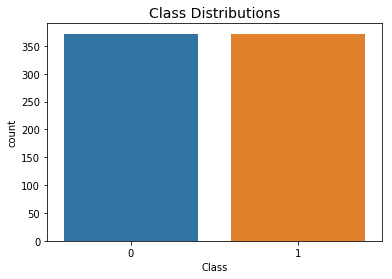

In [19]:
sns.countplot('Class', data=balanced_data)
plt.title('Class Distributions', fontsize=14)

What we just did was remove a bunch of data in order to have a more balanced dataset. We determined how many fraud transactions there were in out training set. Once we have that amount, we should make our 'non fraud' transactions have the same amount. This avoids overfitting, only problem with this technique is that there is a lot of information loss so our model may not perform as accurately.

### Removing Outliers from dataset

First we want to use a correlation matrix to gain information on the data set. A correlation matrix will tell us which features influence which class a transaction belongs to. It'll tell us which features have a possitive correlation aswell as the features that have a negative correlation

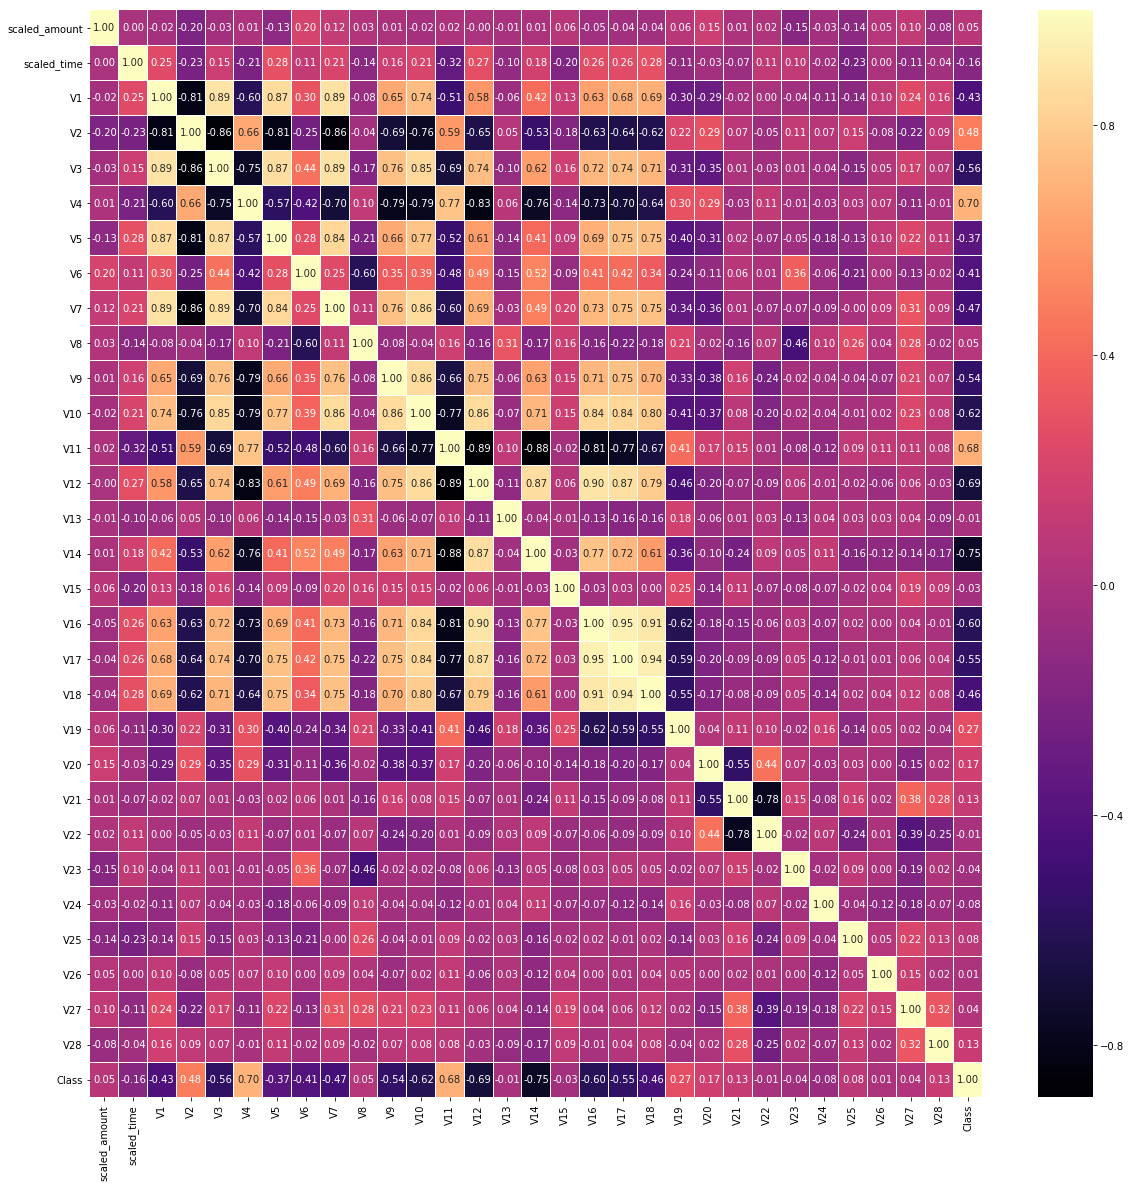

In [20]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(balanced_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

From this Correlation matrix we can see that:

#### Positive Correlation: 
v2, v4, v11

#### Negative Correlation:
v10, v12, v14, v17, V3, V9, V16

### Use BoxPlots to identify Outliers

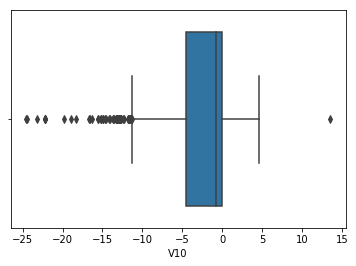

In [21]:
sns.boxplot(x= balanced_data['V10'])

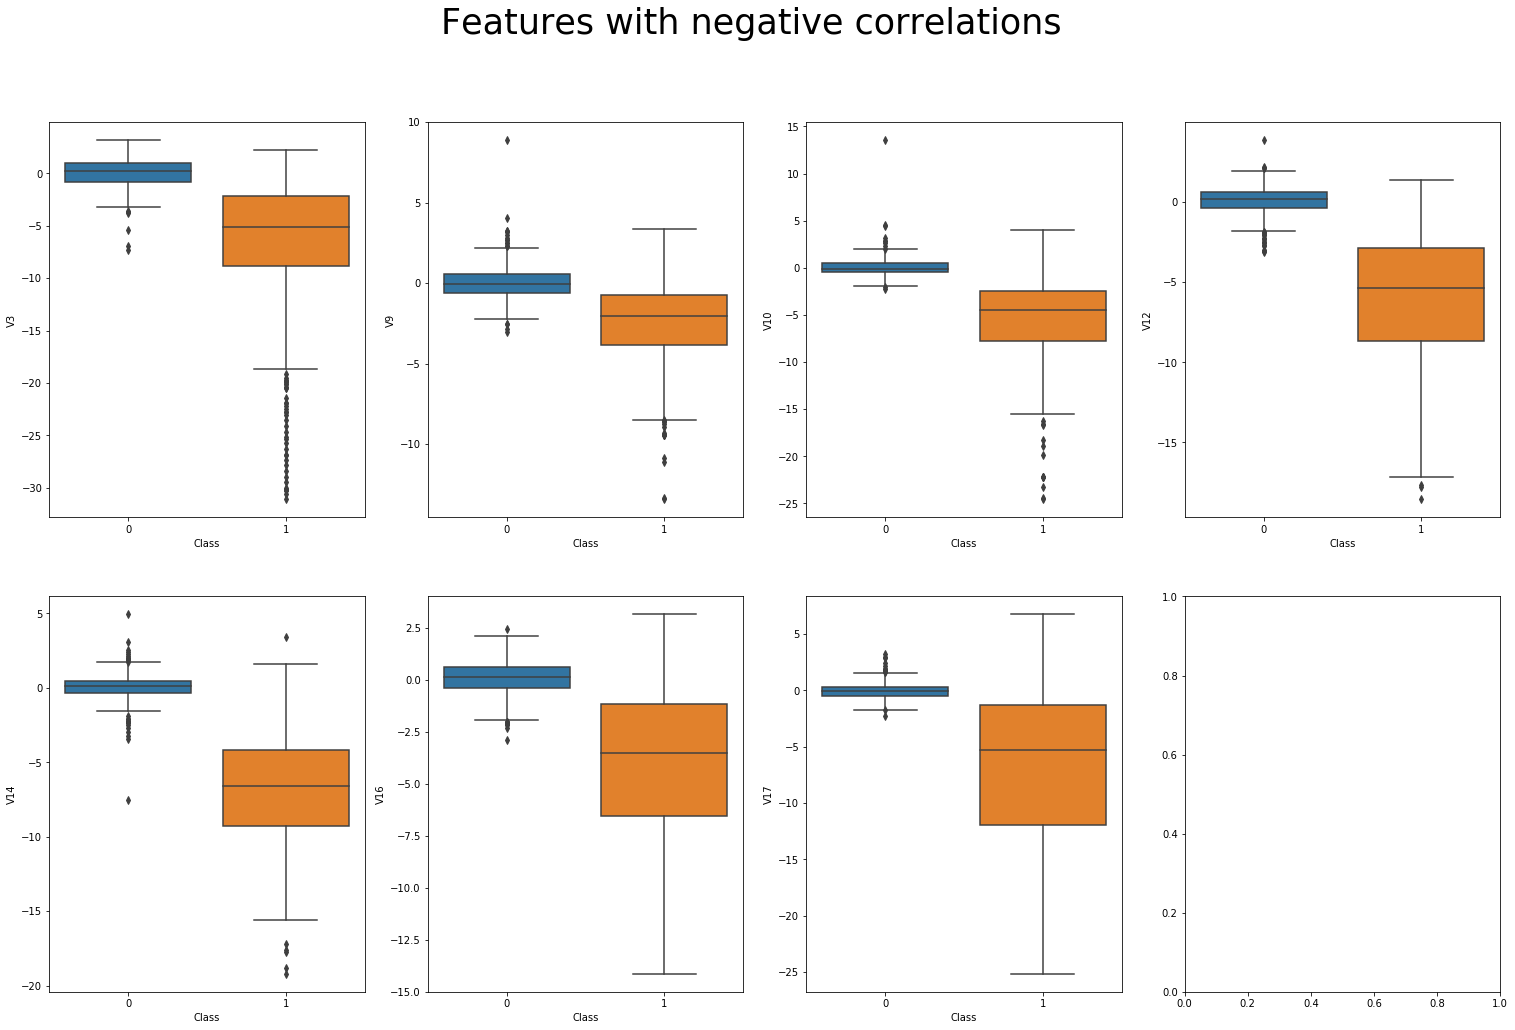

In [22]:
#Figures with negative correlations [V3, V9, V10, V12, V14, V16,V17]
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(26,16))

fig.suptitle('Features with negative correlations', size = 35)
sns.boxplot(x= 'Class', y='V3', data= balanced_data, ax = axes[0,0])
sns.boxplot(x= 'Class', y='V9', data= balanced_data, ax = axes[0,1])
sns.boxplot(x= 'Class', y='V10', data= balanced_data, ax = axes[0,2])
sns.boxplot(x= 'Class', y='V12', data= balanced_data, ax = axes[0,3])
sns.boxplot(x= 'Class', y='V14', data= balanced_data, ax = axes[1,0])
sns.boxplot(x= 'Class', y='V16', data= balanced_data, ax = axes[1,1])
sns.boxplot(x= 'Class', y='V17', data= balanced_data, ax = axes[1,2])

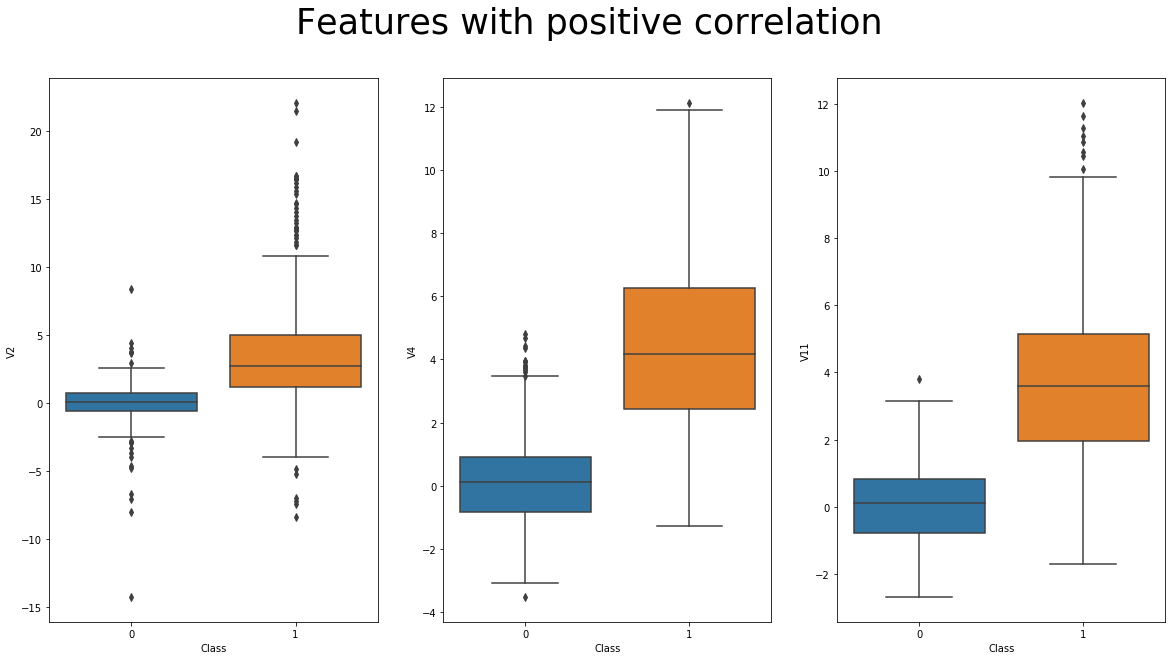

In [23]:
# features with positive correlations [V4, V11]
fig, axes = plt.subplots(nrows= 1, ncols = 3, figsize = (20,10))

fig.suptitle('Features with positive correlation', size =35)
sns.boxplot(x='Class', y='V2', data= balanced_data, ax = axes[0])
sns.boxplot(x='Class', y='V4', data= balanced_data, ax = axes[1])
sns.boxplot(x= 'Class', y='V11', data= balanced_data, ax = axes[2])

We'll only remove extreme outliers because we do not want to reduce the dataset by too much. We'll remove the outliers using the Inter Quartile Range Method

In [0]:
quantile_one = balanced_data.quantile(0.25)
quantile_three= balanced_data.quantile(0.75)

inter_quan_range = quantile_three - quantile_one

new_data = balanced_data[~((balanced_data < (quantile_one - 2.5*inter_quan_range)) 
                           | (balanced_data > (quantile_three + 2.5*inter_quan_range))).any(axis = 1)]

In [25]:
data_removed = len(balanced_data) - len(new_data)
print(data_removed)
print(balanced_data.shape)
print(new_data.shape)

223
(744, 31)
(521, 31)


## Training Models

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [30]:
rf_params = {"max_depth": [10, 20], 'n_estimators': [50, 100], 'min_samples_leaf': [10]}
rf = RandomForestClassifier(random_state=0)
rf_grid = GridSearchCV(rf, param_grid = rf_params, scoring = 'roc_auc', verbose = 5, n_jobs = 70) 

rf_grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=70)]: Using backend LokyBackend with 70 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=70)]: Done   2 out of  12 | elapsed:  2.4min remaining: 11.9min
[Parallel(n_jobs=70)]: Done   5 out of  12 | elapsed:  7.0min remaining:  9.9min
[Parallel(n_jobs=70)]: Done   8 out of  12 | elapsed:  8.5min remaining:  4.3min
[Parallel(n_jobs=70)]: Done  12 out of  12 | elapsed: 10.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=70,
             param_grid=

In [0]:
best_params = rf_grid.best_estimator_.get_params()

In [32]:
for param_name in sorted(rf_params.keys()):
    print("\t%s: %r" % (param_name, best_params[param_name]))

	max_depth: 10
	min_samples_leaf: 10
	n_estimators: 100


In [0]:
rf = RandomForestClassifier(max_depth = 10 , min_samples_leaf = 10, n_estimators = 100 ).fit(X_train, y_train)

In [34]:
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
    .format(rf.score(X_train, y_train)))
print('\nAccuracy of Random Forest Classifier on test set: {:.2f}'
    .format(rf.score(X_test, y_test)))

print('\nROC AUC score on test set: {:.2f}'.format(roc_auc_score(y_test, rf.predict(X_test))))

print("\nConfusion Matrix on test set: ")
print (confusion_matrix(y_test, rf.predict(X_test)))

Accuracy of Random Forest Classifier on training set: 1.00

Accuracy of Random Forest Classifier on test set: 1.00

ROC AUC score on test set: 0.86

Confusion Matrix on test set: 
[[71074     8]
 [   34    86]]


### Ada Boost Classifier

In [36]:
ada_params = {"learning_rate": [0.75, 1], 'n_estimators': [50, 100]}
ada = AdaBoostClassifier(random_state = 0)
ada_grid = GridSearchCV(ada, param_grid = ada_params, scoring = 'roc_auc', verbose = 5, n_jobs = 70) 

ada_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=70)]: Using backend LokyBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done   2 out of  12 | elapsed:  2.7min remaining: 13.3min
[Parallel(n_jobs=70)]: Done   5 out of  12 | elapsed:  7.0min remaining:  9.8min
[Parallel(n_jobs=70)]: Done   8 out of  12 | elapsed:  7.1min remaining:  3.6min
[Parallel(n_jobs=70)]: Done  12 out of  12 | elapsed:  8.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='warn', n_jobs=70,
             param_grid={'learning_rate': [0.75, 1], 'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=5)

In [38]:
best_params = ada_grid.best_estimator_.get_params()

for param_name in sorted(ada_params.keys()):
    print("\t%s: %r" % (param_name, best_params[param_name]))

	learning_rate: 1
	n_estimators: 50


In [0]:
ada = AdaBoostClassifier(learning_rate = 1.0 , n_estimators = 50 ).fit(X_train, y_train)

In [46]:
print('Accuracy of Ada Boost Classifier on training set: {:.2f}'
    .format(ada.score(X_train, y_train)))
print('\nAccuracy of Ada Boost Classifier on test set: {:.2f}'
    .format(ada.score(X_test, y_test)))

print('\nROC AUC score on test set: {:.2f}'.format(roc_auc_score(y_test, ada.predict(X_test))))

print("\nConfusion Matrix on test set: ")
print (confusion_matrix(y_test, ada.predict(X_test)))

Accuracy of Ada Boost Classifier on training set: 1.00

Accuracy of Ada Boost Classifier on test set: 1.00

ROC AUC score on test set: 0.85

Confusion Matrix on test set: 
[[71065    17]
 [   36    84]]


### Support Vector Machine

In [0]:
from sklearn.svm import SVC, LinearSVC

In [42]:
svm_params = {"C": np.power(5.0, np.arange(-3,3))}
svm = LinearSVC(random_state = 0)
svm_grid = GridSearchCV(svm, param_grid = svm_params, scoring = 'roc_auc', verbose = 5, n_jobs = 70) 

svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=70)]: Using backend LokyBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done   3 out of  18 | elapsed:  1.7min remaining:  8.6min
[Parallel(n_jobs=70)]: Done   7 out of  18 | elapsed:  4.9min remaining:  7.8min
[Parallel(n_jobs=70)]: Done  11 out of  18 | elapsed:  9.8min remaining:  6.2min
[Parallel(n_jobs=70)]: Done  15 out of  18 | elapsed: 10.3min remaining:  2.1min
[Parallel(n_jobs=70)]: Done  18 out of  18 | elapsed: 10.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='warn', n_jobs=70,
             param_grid={'C': array([8.0e-03, 4.0e-02, 2.0e-01, 1.0e+00, 5.0e+00, 2.5e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=5)

In [43]:
best_params = svm_grid.best_estimator_.get_params()

for param_name in sorted(svm_params.keys()):
    print("\t%s: %r" % (param_name, best_params[param_name]))

	C: 1.0


In [45]:
svm = LinearSVC(C = 1.0, random_state = 0)
svm.fit(X_train, y_train)

print('Accuracy of SVM on training set: {:.2f}'
    .format(svm.score(X_train, y_train)))
print('\nAccuracy of SVM on test set: {:.2f}'
    .format(svm.score(X_test, y_test)))

print('\nROC AUC score on test set: {:.2f}'.format(roc_auc_score(y_test, svm.predict(X_test))))

print("\nConfusion Matrix on test set: ")
print (confusion_matrix(y_test, svm.predict(X_test)))

Accuracy of SVM on training set: 1.00

Accuracy of SVM on test set: 1.00

ROC AUC score on test set: 0.84

Confusion Matrix on test set: 
[[71072    10]
 [   39    81]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Stacking

Collect outputs from base models and use them as inputs for our new model.

### Create new dataset with predictions from base models

In [49]:
# Dataset that will be the train set of the second model
first_level = pd.DataFrame(rf.predict(X_train), columns=['RandomForest'])
first_level['ADA'] = ada.predict(X_train)
first_level['SVM'] = svm.predict(X_train)
first_level['label'] = y_train.values
first_level.sample(10)

,RandomForest,ADA,SVM,label
154991,0,0,0,0
40341,0,0,0,0
101429,0,0,0,0
10487,0,0,0,0
74720,0,0,0,0
181318,0,0,0,0
198581,0,0,0,0
125847,0,0,0,0
132469,0,0,0,0
117395,0,0,0,0


In [50]:
# Dataset that will be the test set of the second model
first_level_test = pd.DataFrame(rf.predict(X_test), columns=['RandomForest'])
first_level_test['ADA'] = ada.predict(X_test)
first_level_test['SVM'] = svm.predict(X_test)
first_level_test['label'] = y_test.values
first_level_test.sample(10)

,RandomForest,ADA,SVM,label
1116,0,0,0,0
56710,0,0,0,0
16436,0,0,0,0
57579,0,0,0,0
7561,0,0,0,0
21245,0,0,0,0
52658,0,0,0,0
59044,0,0,0,0
34976,0,0,0,0
32849,0,0,0,0


In [51]:
meta_params = {'C': np.power(10.0, np.arange(-3,3))}
meta_model = LogisticRegression(verbose = 3)
meta_grid = GridSearchCV(meta_model, param_grid = meta_params, scoring = 'roc_auc', n_jobs = 70)

first_level.drop('label', inplace = True, axis = 1)
meta_grid.fit(first_level, y_train )

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=3,
                                          warm_start=False),
             iid='warn', n_jobs=70,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [0]:
first_level_test.drop('label', inplace = True, axis = 1)

In [54]:
meta_model = LogisticRegression(C = 1.0).fit(first_level, y_train)

print('Accuracy of Meta Model on training set: {:.2f}'
    .format(meta_model.score(first_level, y_train)))
print('\nAccuracy of Meta Model on test set: {:.2f}'
    .format(meta_model.score(first_level_test, y_test)))

print('\nROC AUC score on test set: {:.2f}'.format(roc_auc_score(y_test, meta_model.predict(first_level_test))))

print("\nConfusion Matrix on test set: ")
print (confusion_matrix(y_test, meta_model.predict(first_level_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Meta Model on training set: 1.00

Accuracy of Meta Model on test set: 1.00

ROC AUC score on test set: 0.85

Confusion Matrix on test set: 
[[71074     8]
 [   36    84]]
